In [53]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [54]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [55]:
head(df)

X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
1,1,2010-02-05,1643691,0,42.31,2.572,211.0964,8.106,NA
2,1,2010-02-12,1641957,1,38.51,2.548,211.2422,8.106,0.06907348
3,1,2010-02-19,1611968,0,39.93,2.514,211.2891,8.106,0.02223661
4,1,2010-02-26,1409728,0,46.63,2.561,211.3196,8.106,0.01443520
5,1,2010-03-05,1554807,0,46.50,2.625,211.3501,8.106,0.01443311
6,1,2010-03-12,1439542,0,57.79,2.667,211.3806,8.106,0.01443103


Estudando o efeito do CPI

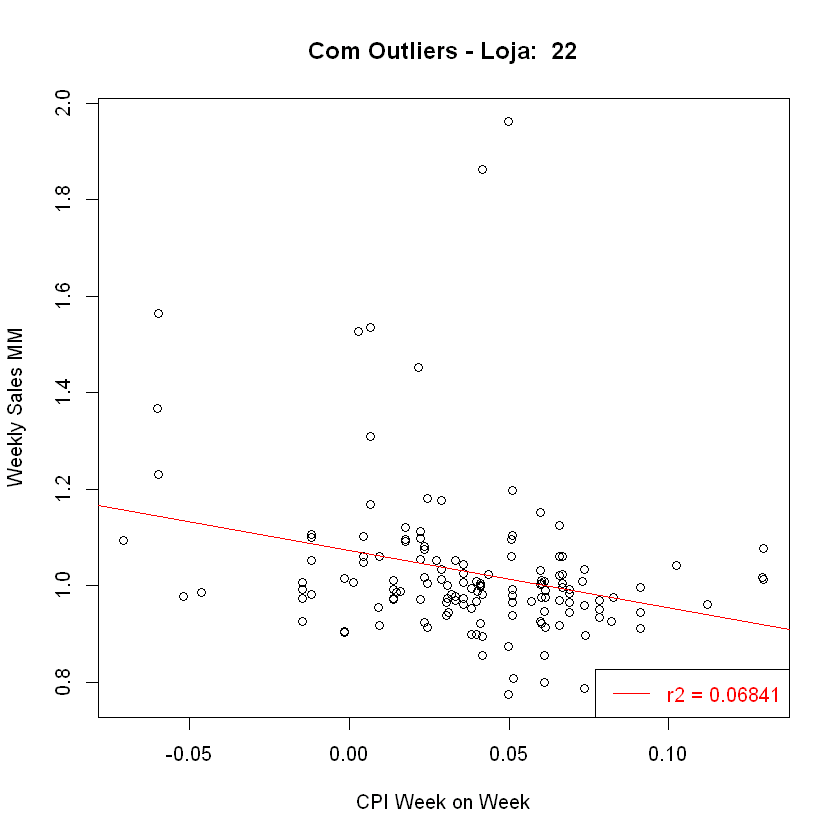

In [56]:
nstore = 22
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}



plot(dfplot$Weekly_CPI,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'CPI Week on Week',
    main = paste( 'Com Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Weekly_CPI)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")



In [57]:
2

[1] 2

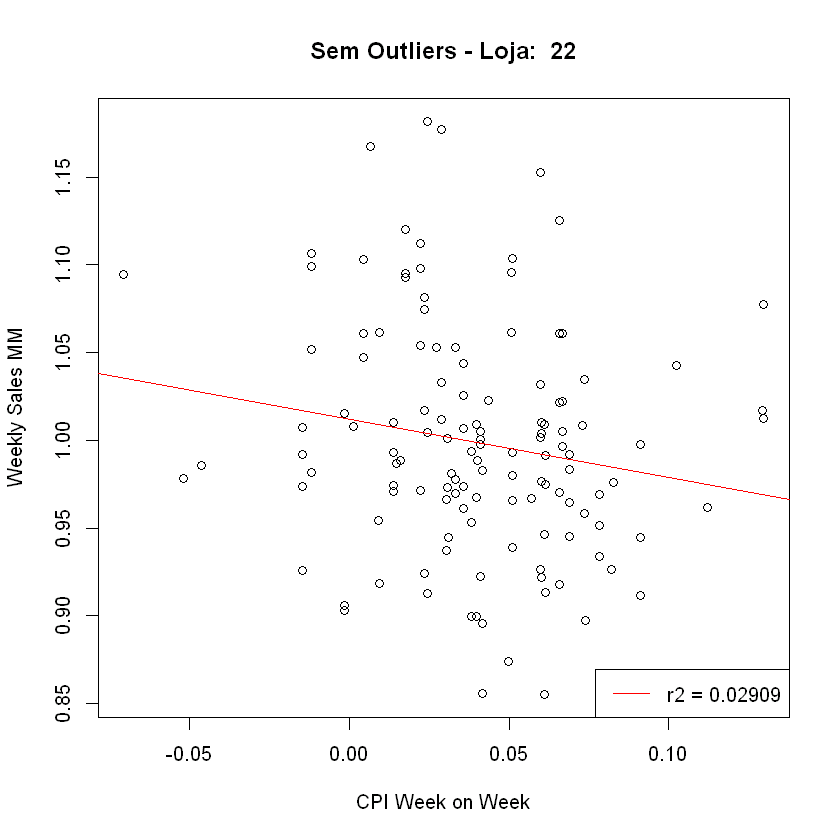

In [58]:
nstore = 22

# Calculate Q1, Q3, and IQR
if (nstore > 0){
    Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
    Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
    } else {
    Q1 <- quantile(df$Weekly_Sales, 0.25)
    Q3 <- quantile(df$Weekly_Sales, 0.75) 
    }

IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

if (nstore > 0){
   dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
} else {
    dfplot = dfplot = df[(df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
}
plot(dfplot$Weekly_CPI,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'CPI Week on Week',
    main = paste( 'Sem Outliers - Loja: ', nstore))

lm_model = lm(dfplot$Weekly_Sales/1000000 ~dfplot$Weekly_CPI)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="black")

text(50, 0.5, "Title", col="green", cex=1.5)

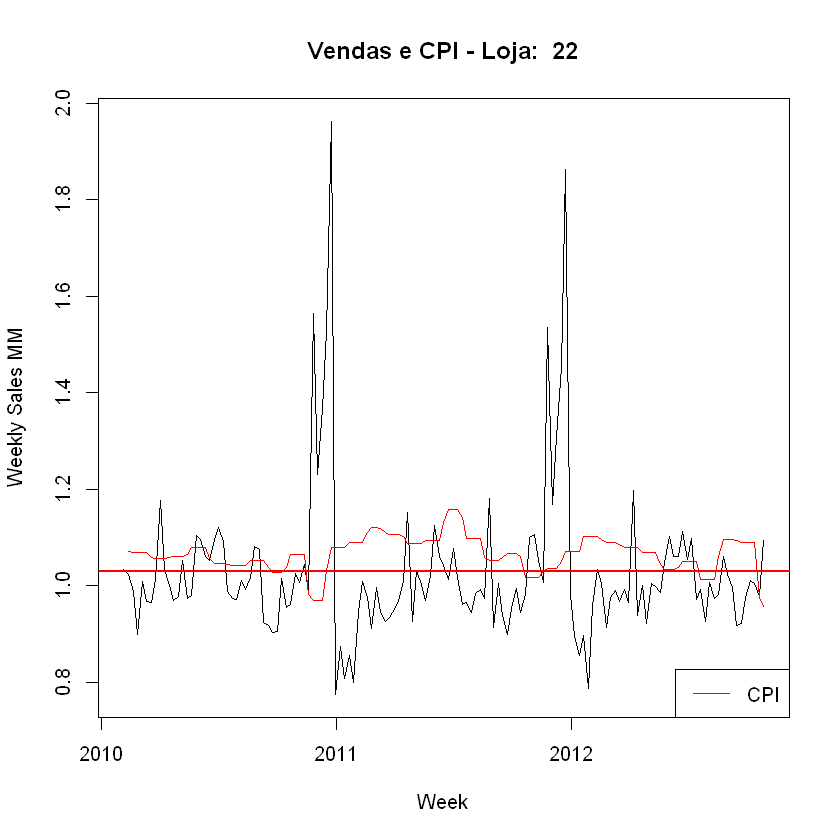

In [59]:
nstore = 22

dfplot = df[(df$Store == nstore),]
mean_sales = mean(dfplot$Weekly_Sales/1000000)
plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Week',
    main = paste( 'Vendas e CPI - Loja: ', nstore))
lines(dfplot$Date,(dfplot$Weekly_CPI+mean_sales),
      col = "red")
abline(h = mean_sales, col = "red", lwd = 2)
legend("bottomright", legend="CPI", lty=1, col="red", text.col="black")


A correlação direta entre CPI e as vendas é fraca. 
Agora será verificada am distribuição de vendas por quartis de CPI.

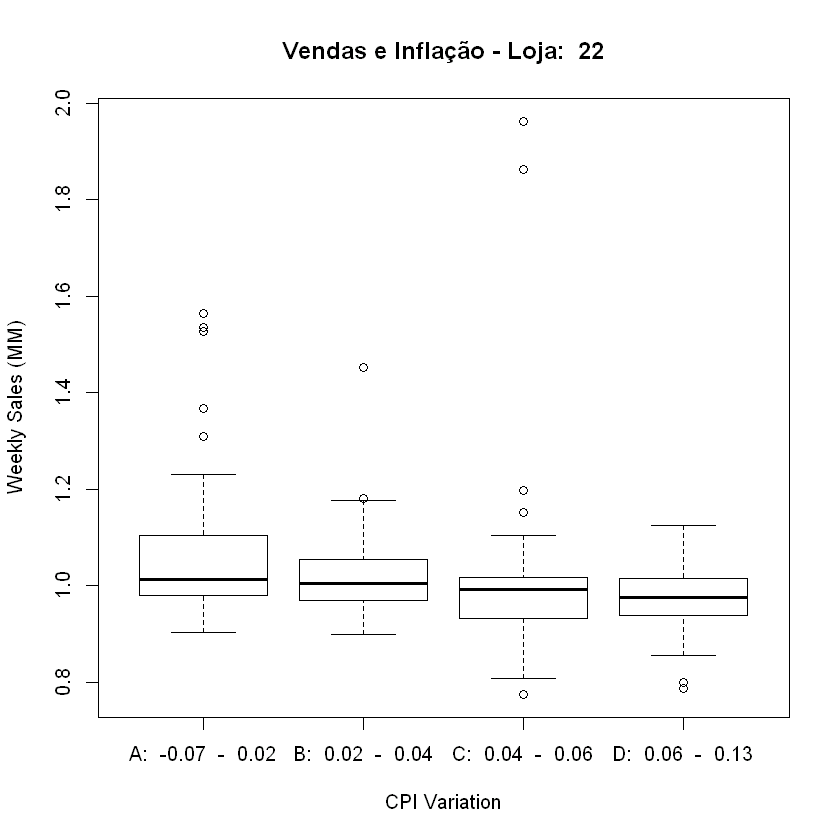

In [60]:
Q0_CPI = min(dfplot[dfplot$Store == nstore,]$Weekly_CPI, na.rm = TRUE)
Q1_CPI = quantile(dfplot[dfplot$Store == nstore,]$Weekly_CPI, 0.25, na.rm = TRUE)
Q2_CPI = quantile(dfplot[dfplot$Store == nstore,]$Weekly_CPI, 0.50, na.rm = TRUE)
Q3_CPI = quantile(dfplot[dfplot$Store == nstore,]$Weekly_CPI, 0.75, na.rm = TRUE)
Q4_CPI = max(dfplot[dfplot$Store == nstore,]$Weekly_CPI, na.rm = TRUE)
dfplot$CPI_Quantile= ''

label_1 = paste("A: ",round(Q0_CPI, 2)," - ",round(Q1_CPI, 2))
label_2 = paste("B: ",round(Q1_CPI, 2)," - ",round(Q2_CPI, 2))
label_3 = paste("C: ",round(Q2_CPI, 2)," - ",round(Q3_CPI, 2))
label_4 = paste("D: ",round(Q3_CPI, 2)," - ",round(Q4_CPI, 2))

dfplot$CPI_Quantile = ifelse(dfplot$Weekly_CPI <= Q1_CPI,label_1, dfplot$CPI_Quantile)
dfplot$CPI_Quantile = ifelse(dfplot$Weekly_CPI > Q1_CPI & dfplot$Weekly_CPI <= Q2_CPI ,label_2, dfplot$CPI_Quantile)
dfplot$CPI_Quantile = ifelse(dfplot$Weekly_CPI > Q2_CPI & dfplot$Weekly_CPI <= Q3_CPI ,label_3, dfplot$CPI_Quantile)
dfplot$CPI_Quantile = ifelse(dfplot$Weekly_CPI > Q3_CPI,label_4, dfplot$CPI_Quantile)

bp = boxplot(Weekly_Sales/1000000 ~ CPI_Quantile, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'CPI Variation',
        main = paste( 'Vendas e Inflação - Loja: ', nstore)
       )

Pela divisão em quartis fica notável que o aumento na variação semanal do CPI afeta as vendas, 
com maior aumento de preços resultando um menos vendas.

In [61]:
print(bp$stats)

          [,1]      [,2]      [,3]      [,4]
[1,] 0.9027793 0.8998348 0.8075355 0.8550010
[2,] 0.9797976 0.9683909 0.9326260 0.9390578
[3,] 1.0126889 1.0044345 0.9927744 0.9754158
[4,] 1.1047165 1.0534275 1.0162293 1.0148174
[5,] 1.2305146 1.1773410 1.1037404 1.1251699


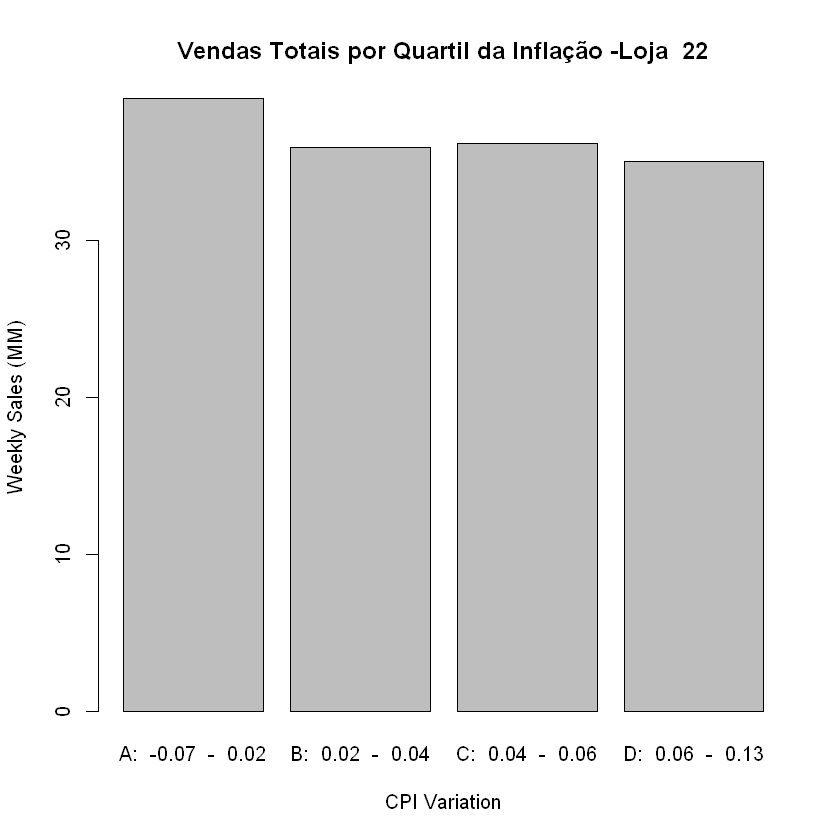

In [62]:
sums <- aggregate(Weekly_Sales ~ CPI_Quantile, dfplot, sum)

# Create barplot
barplot(sums$Weekly_Sales/1000000, 
        names.arg = sums$CPI_Quantile,
       main = paste("Vendas Totais por Quartil da Inflação -Loja ", nstore),
        xlab = "CPI Variation",
        ylab = "Weekly Sales (MM)"
        )